In [93]:
# 1. Đọc dữ liệu từ file housing_data.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [94]:
data = pd.read_csv("housing_data.csv")
# Xem trước dữ liệu
print("📊 Dữ liệu mẫu:")
print(data.head())

📊 Dữ liệu mẫu:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [95]:
# 2. Tiền xử lý dữ liệu: One-Hot Encoding cho các biến phân loại
categorical_cols = [
    "mainroad", "guestroom", "basement", "hotwaterheating",
    "airconditioning", "prefarea", "furnishingstatus"
]
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
# Xem kết quả tiền xử lý
print("📊 Dữ liệu sau khi tiền xử lý:")
print(data_encoded.head())

📊 Dữ liệu sau khi tiền xử lý:
      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_u

In [96]:
# 3. Chia dữ liệu thành X (biến đầu vào) và y (biến mục tiêu)
X = data_encoded.drop("price", axis=1)
y = data_encoded["price"]

# 4. Tách tập train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# 5. Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.65


In [97]:
# 7. In hệ số chặn và hệ số hồi quy
print("\nIntercept (β₀):", model.intercept_)
print("Coefficients (β₁, β₂, ...):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept (β₀): 260032.35760741215
Coefficients (β₁, β₂, ...):
area: 235.96880454139568
bedrooms: 76778.70163437817
bathrooms: 1094444.7861005974
stories: 407476.5949849111
parking: 224841.91327662626
mainroad_yes: 367919.94767957245
guestroom_yes: 231610.03717564975
basement_yes: 390251.1761810922
hotwaterheating_yes: 684649.8853387911
airconditioning_yes: 791426.7358431863
prefarea_yes: 629890.56531336
furnishingstatus_semi-furnished: -126881.81758510822
furnishingstatus_unfurnished: -413645.06222822214


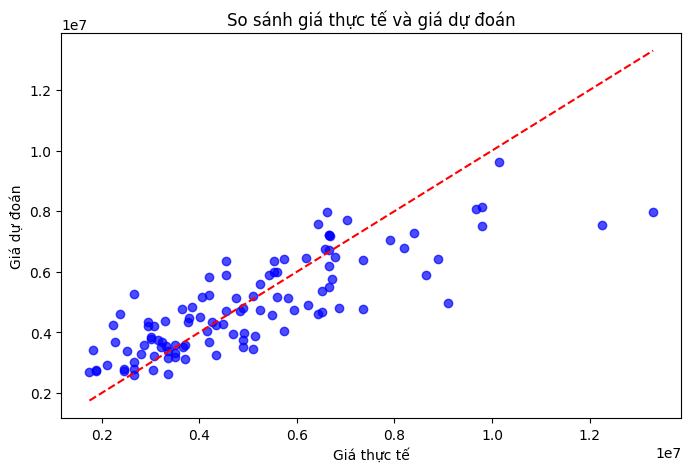

In [100]:
# 8. Vẽ biểu đồ so sánh giá thực tế và giá dự đoán
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Giá thực tế")
plt.ylabel("Giá dự đoán")
plt.title("So sánh giá thực tế và giá dự đoán")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Tạo correlation matrix cho tất cả biến số
correlation_matrix = data.corr()

# 2. Vẽ heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Tất cả các biến số', fontsize=14, pad=20)
plt.tight_layout()
plt.show()